In [1]:
using CSV, Clustering, Plots, LsqFit
gr()

Plots.GRBackend()

## Actual code
The curve fit is just for fun right now, might be useful in the future

  0.756623 seconds (1.55 M allocations: 85.948 MiB, 5.27% gc time)


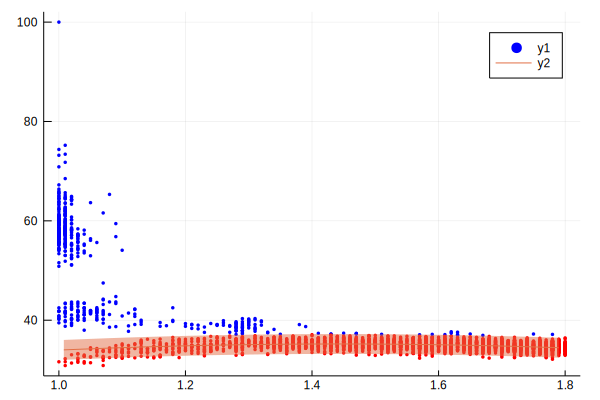

In [68]:
isInNoiseRange(i) = arr[2, i] > 0 || arr[1, i] < 38 
@. model(x, p) = p[1] * x^2 + p[2] * x + p[3]
process(idx::String) = begin
    d = CSV.read("/home/quangio/dev/JuliaDashboard/NYUSH_data/CCNA_$idx"; header=false, delim='\t', types=fill(Float64,2))
    arr = transpose(convert(Matrix, d))[:, :]
    n = length(d[1])   

    clusters = dbscan(arr, 0.1)
    colors = fill("blue", n)
    average = 0.0
    max_cluster = clusters[1]

    for cluster = clusters
        if cluster.size > max_cluster.size max_cluster = cluster end
    end

    indices = filter(isInNoiseRange, max_cluster.core_indices)

    noise_x = [arr[2, i] for i = indices]
    noise_y = [arr[1, i] for i = indices]

    for i = indices
        colors[i] = "red"
        average += d[1][i]
    end
    average /= length(indices)

    for i = 1:n
        if d[1][i] < average
            colors[i] = "red"
        end
    end
    p0 = [.5, .5, 0]
    fit = curve_fit(model, noise_x, noise_y, p0)
    p = fit.param
    fit_curve(x) =  p[1] * x^2 + p[2] * x +  p[3]
    scatter(d[2], d[1], color=colors, ms=2, msw=0)
    plot!(fit_curve, 1, 1.8, ribbon=(2, 2), fillalpha=.5)
end
@time process(lpad(116, 5, '0'))

In [69]:
@gif for i = 1:257
    process(lpad(i, 5, '0'))
end

┌ Info: Saved animation to 
│   fn = /home/quangio/dev/JuliaDashboard/tmp.gif
└ @ Plots /home/quangio/.julia/packages/Plots/gylTh/src/animation.jl:90


Plots.AnimatedGif("/home/quangio/dev/JuliaDashboard/tmp.gif")

## Play gound

In [52]:
d = CSV.read("/home/quangio/dev/JuliaDashboard/NYUSH_data/CCNA_00116"; header=false, delim='\t', types=fill(Float64,2))
arr = transpose(convert(Matrix, d))[:, :]
n = length(d[1])   
    
clusters = dbscan(arr, 0.1)
colors = fill("blue", n)
average = 0.0
max_cluster = clusters[1]

for cluster = clusters
    if cluster.size > max_cluster.size max_cluster = cluster end
end

indices = filter(isInNoiseRange, max_cluster.core_indices)

noise_x = [arr[2, i] for i = indices]
noise_y = [arr[1, i] for i = indices]

for i = indices
    colors[i] = "red"
    average += d[1][i]
end
average /= length(indices)

for i = 1:n
    if d[1][i] < average
        colors[i] = "red"
    end
end

LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([-6.23754, 18.0124, 22.2115], [-0.202569, -0.106391, 0.371199, 0.390662, 0.650274, 0.113073, -0.488043, 0.938229, -0.845967, 0.712029  …  -0.107971, 0.1176, -0.771044, -0.375718, -0.899726, -0.436826, -0.10924, -0.758801, 0.288956, 0.101106], [2.8224 1.68 1.0; 2.1316 1.46 1.0; … ; 2.3409 1.53 1.0; 2.4336 1.56 1.0], true, Float64[])

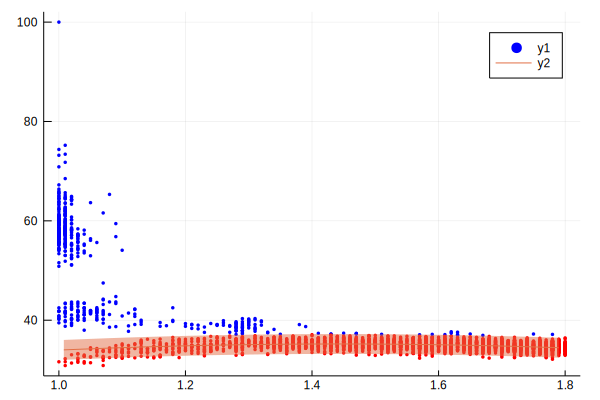

In [65]:

p0 = [.5, .5, 0]
fit = curve_fit(model, noise_x, noise_y, p0)

p = fit.param
fit_curve(x) =  p[1] * x^2 + p[2] * x +  p[3]
scatter(d[2], d[1], color=colors, ms=2, msw=0)
plot!(fit_curve, 1, 1.8, ribbon=(2, 2), fillalpha=.5)

3225-element Array{Int64,1}:
    1
    2
    3
    5
    6
    7
    8
    9
   10
   11
   12
   13
   14
    ⋮
 3657
 3659
 3660
 3661
 3662
 3663
 3664
 3666
 3667
 3668
 3669
 3670

118